In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from IPython.display import display, Markdown, Latex
from sklearn.datasets import make_blobs
%matplotlib widget
from matplotlib.widgets import Slider
from lab_utils_common import dlc
from lab_utils_softmax import plt_softmax
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [2]:
def my_softmax(z):
    ez = np.exp(z)              #element-wise exponenial
    sm = ez/np.sum(ez)
    return(sm)

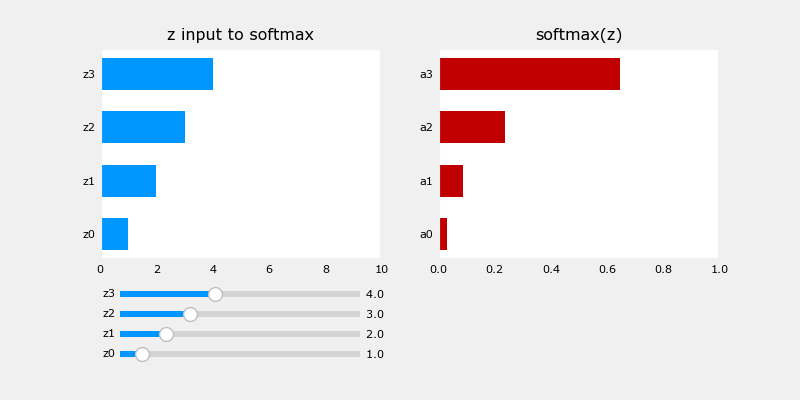

In [3]:
plt.close("all")
plt_softmax(my_softmax)

In [4]:
# make  dataset for example
centers = [[-5, 2], [-2, -2], [1, 2], [5, -2]]
X_train, y_train = make_blobs(n_samples=2000, centers=centers, cluster_std=1.0,random_state=30)

## NOT Preferred way

In [5]:
model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'softmax')    # < softmax activation here
    ]
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(0.001),
)

model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 1s 1ms/step - loss: 0.9875
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3744
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1663
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1019
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0764
Epoch 6/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0639
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0562
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0510
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0477
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0437


In [6]:
p_nonpreferred = model.predict(X_train)
print(p_nonpreferred [:2])
print("largest value", np.max(p_nonpreferred), "smallest value", np.min(p_nonpreferred))

63/63 [==============================] - 0s 1ms/step
[[4.12e-03 3.32e-03 9.75e-01 1.77e-02]
 [9.95e-01 4.50e-03 2.09e-04 7.15e-06]]
largest value 0.99999845 smallest value 1.2742443e-09


## Preferred way

In [7]:
preferred_model = Sequential(
    [ 
        Dense(25, activation = 'relu'),
        Dense(15, activation = 'relu'),
        Dense(4, activation = 'linear')   #<-- Note
    ]
)
preferred_model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),  #<-- Note
    optimizer=tf.keras.optimizers.Adam(0.001),
)

preferred_model.fit(
    X_train,y_train,
    epochs=10
)

Epoch 1/10
63/63 [==============================] - 1s 1ms/step - loss: 0.8882
Epoch 2/10
63/63 [==============================] - 0s 1ms/step - loss: 0.3481
Epoch 3/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1627
Epoch 4/10
63/63 [==============================] - 0s 1ms/step - loss: 0.1016
Epoch 5/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0767
Epoch 6/10
63/63 [==============================] - 0s 2ms/step - loss: 0.0633
Epoch 7/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0551
Epoch 8/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0494
Epoch 9/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0452
Epoch 10/10
63/63 [==============================] - 0s 1ms/step - loss: 0.0415


In [8]:
p_preferred = preferred_model.predict(X_train)
print(f"two example output vectors:\n {p_preferred[:2]}")
print("largest value", np.max(p_preferred), "smallest value", np.min(p_preferred))

63/63 [==============================] - 0s 1ms/step
two example output vectors:
 [[-0.02 -1.26  4.76  1.06]
 [ 5.38 -0.01 -3.62 -5.25]]
largest value 16.558292 smallest value -7.4858065


#### Since in the preferred way, we dont get outputs as probabilities (since the output activation func -> linear), we'll have to pass the outputs through a softmax function to get the probabilities

In [9]:
sm_preferred = tf.nn.softmax(p_preferred).numpy()
print(f"two example output vectors:\n {sm_preferred[:2]}")
print("largest value", np.max(sm_preferred), "smallest value", np.min(sm_preferred))

two example output vectors:
 [[8.11e-03 2.34e-03 9.66e-01 2.39e-02]
 [9.95e-01 4.55e-03 1.23e-04 2.41e-05]]
largest value 0.99999917 smallest value 3.926875e-09


In [10]:
for i in range(5):
    print( f"{p_preferred[i]}, category: {np.argmax(p_preferred[i])}")

[-0.02 -1.26  4.76  1.06], category: 2
[ 5.38 -0.01 -3.62 -5.25], category: 0
[ 3.87  0.53 -2.71 -4.24], category: 0
[-0.75  4.23 -0.97 -1.93], category: 1
[ 2.42 -2.85  7.57 -1.91], category: 2


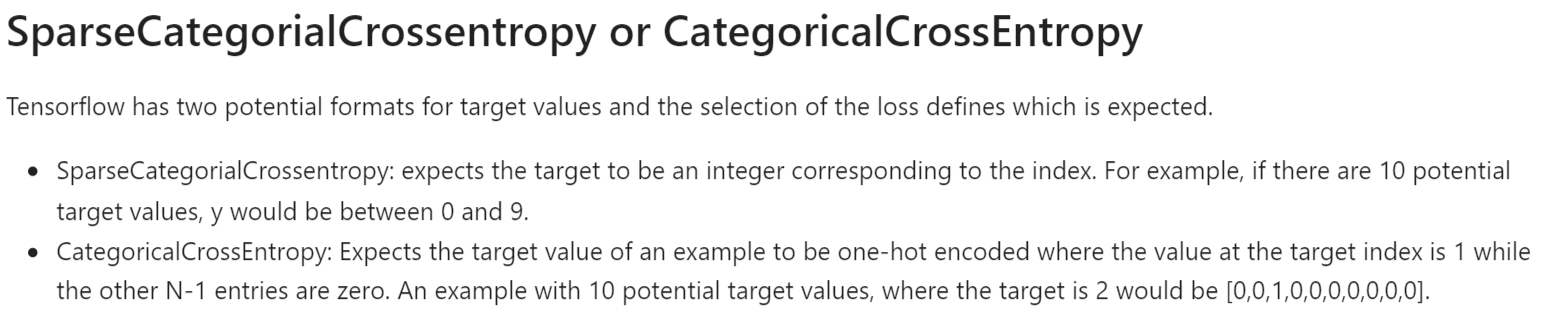